In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import operators
import lowlevelheuristics

In [2]:
class Plane(object):
    def __init__(self):
        self.i = None;
        self.a = None; #appearance time
        self.e = None; #earliest
        self.l = None; #latest
        self.t = None; #target
        self.s = [];   #required seperation
        self.g = None; #penalty before
        self.h = None; #penalty after
        
        self.x = -1; #actual landing time
        
    def clone(plane):
        clone = Plane()
        clone.i = plane.i
        clone.a = plane.a
        clone.e = plane.e
        clone.t = plane.t
        clone.l = plane.l
        clone.g = plane.g
        clone.h = plane.h
        clone.s = plane.s[:]
        
        clone.x = plane.x
        
        return clone
    
    def getFitness(self):
        if self.x == self.t:
            return 0
        if self.x > self.t:
            return (self.x - self.t) * self.h
        return (self.t - self.x) * self.g
    
    def __str__(self):
        result = 'appearance time: ' + str(self.a) + '\n' \
                 'earliest: ' + str(self.e) + '\n' \
                 'latest: ' + str(self.l) + '\n' \
                 'target: ' + str(self.t) + '\n' \
                 'penalty before: ' + str(self.g) + '\n' \
                 'penalty after: ' + str(self.h) + '\n' \
                 '--> actual: ' + str(self.x) + '\n' \
                 '--> fitness: ' + str(self.getFitness()) + '\n'
        result += str(self.s) + '\n\n'
        return result

In [3]:
location = './problems/'
prefix = 'airland'
fileType = '.txt'

problemsNumber = 13

problems = []
for i in range(1, problemsNumber + 1):
    problems.append([location + prefix + str(i) + fileType, prefix + str(i)])
    
problems

[['./problems/airland1.txt', 'airland1'],
 ['./problems/airland2.txt', 'airland2'],
 ['./problems/airland3.txt', 'airland3'],
 ['./problems/airland4.txt', 'airland4'],
 ['./problems/airland5.txt', 'airland5'],
 ['./problems/airland6.txt', 'airland6'],
 ['./problems/airland7.txt', 'airland7'],
 ['./problems/airland8.txt', 'airland8'],
 ['./problems/airland9.txt', 'airland9'],
 ['./problems/airland10.txt', 'airland10'],
 ['./problems/airland11.txt', 'airland11'],
 ['./problems/airland12.txt', 'airland12'],
 ['./problems/airland13.txt', 'airland13']]

In [4]:
problemIndex = 2

problemSetLines = pd.read_csv(problems[problemIndex][0], header=None).values.tolist()

problemSet = []
for line in problemSetLines: 
    problemSet.append(line[0].strip().split(' '))

problemSet

[['15', '10'],
 ['54', '129', '155', '559', '10.00', '10.00'],
 ['99999', '3', '15', '15', '15', '15', '15', '15'],
 ['15', '15', '3', '3', '15', '15', '3'],
 ['115', '190', '250', '732', '10.00', '10.00'],
 ['3', '99999', '15', '15', '15', '15', '15', '15'],
 ['15', '15', '3', '3', '15', '15', '3'],
 ['9', '84', '93', '501', '30.00', '30.00'],
 ['15', '15', '99999', '8', '8', '8', '8', '8'],
 ['8', '8', '15', '15', '8', '8', '15'],
 ['14', '89', '98', '509', '30.00', '30.00'],
 ['15', '15', '8', '99999', '8', '8', '8', '8'],
 ['8', '8', '15', '15', '8', '8', '15'],
 ['25', '100', '111', '536', '30.00', '30.00'],
 ['15', '15', '8', '8', '99999', '8', '8', '8'],
 ['8', '8', '15', '15', '8', '8', '15'],
 ['32', '107', '120', '552', '30.00', '30.00'],
 ['15', '15', '8', '8', '8', '99999', '8', '8'],
 ['8', '8', '15', '15', '8', '8', '15'],
 ['34', '109', '121', '550', '30.00', '30.00'],
 ['15', '15', '8', '8', '8', '8', '99999', '8'],
 ['8', '8', '15', '15', '8', '8', '15'],
 ['34', '109'

In [5]:
firstLine = problemSet.pop(0)
P = int(firstLine[0])
Freeze = int(firstLine[1])

P, Freeze

(15, 10)

In [6]:
planeList = []

done = False
planeIndex = 0
while planeIndex < P:
    planeIndex += 1
    props = problemSet.pop(0)
    i = Plane()
    i.i = planeIndex - 1
    i.a = int(props[0]) #appearance time, 
    i.e = int(props[1]) #earliest landing time, 
    i.t = int(props[2]) #target landing time,
    i.l = int(props[3]) #latest landing time, 
    i.g = float(props[4]) #penalty cost per unit of time for landing before target, 
    i.h = float(props[5]) #penalty cost per unit of time for landing after target
    while len(i.s) < P:
        sepTimes = map(int, problemSet.pop(0))
        i.s.extend(sepTimes)
        #separation time required after i lands before j can land
        
    planeList.append(i)
    
    

In [7]:
print(planeList[1])

appearance time: 115
earliest: 190
latest: 732
target: 250
penalty before: 10.0
penalty after: 10.0
--> actual: -1
--> fitness: 2510.0
[3, 99999, 15, 15, 15, 15, 15, 15, 15, 15, 3, 3, 15, 15, 3]




In [8]:
class LandingSolution(object):
    def __init__(self):
        self.landingSolution = None
        
    def clone(self):
        clone = LandingSolution()
        clone.landingSolution = list(map(Plane.clone, self.landingSolution))
        return clone
        
    def constructRandomSolution(self, planes):
        # Loop while not a valid solution
        while not self.valid():
            self.landingSolution = []
            # Loop over planes and try create a solution
            for i, plane in enumerate(planes):
                plane.x = np.random.randint(low=plane.e, high=plane.l + 1)
                #print(plane)
                self.landingSolution.append(plane)
                
    def valid(self):
        if self.landingSolution == None: return False 
        for i, plane in enumerate(self.landingSolution):
            for j, seperation in enumerate(plane.s):
                if i == j: continue
                otherPlane = self.landingSolution[j]
                if plane.x <= otherPlane.x and plane.x + seperation >= otherPlane.x:
                    #print(i, plane, "== > ==\n", j, otherPlane)
                    return False
        return True
    
    def mutate(solution):
        clone = solution.clone()
        randomPlane = clone.landingSolution[np.random.randint(P)]
        randomPlane.x = np.random.randint(low=randomPlane.e, high=randomPlane.l + 1)
        while not clone.valid():
            clone = solution.clone()
            randomPlane = clone.landingSolution[np.random.randint(P)]
            randomPlane.x = np.random.randint(low=randomPlane.e, high=randomPlane.l + 1)
        return clone
    
    def swap(solution):
        clone = solution.clone()
        randomPlane1 = clone.landingSolution[np.random.randint(P)]
        randomPlane2 = clone.landingSolution[np.random.randint(P)]
        randomPlane1.x = randomPlane2.x
        randomPlane2.x = randomPlane1.x
        while not clone.valid():
            clone = solution.clone()
            randomPlane1 = clone.landingSolution[np.random.randint(P)]
            randomPlane2 = clone.landingSolution[np.random.randint(P)]
            randomPlane1.x = randomPlane2.x
            randomPlane2.x = randomPlane1.x
        return clone
    
    def swapCrossover(parent1, parent2):
        clone1 = parent1.clone()
        clone2 = parent2.clone()
        
        randomPlane1 = clone1.landingSolution[np.random.randint(P)]
        randomPlane2 = clone2.landingSolution[np.random.randint(P)]
        
        randomPlane1.x = randomPlane2.x
        randomPlane2.x = randomPlane1.x
        
        while not clone1.valid() and clone2.valid():
            clone1 = parent1.clone()
            clone2 = parent2.clone()

            randomPlane1 = clone1.landingSolution[np.random.randint(P)]
            randomPlane2 = clone2.landingSolution[np.random.randint(P)]

            randomPlane1.x = randomPlane2.x
            randomPlane2.x = randomPlane1.x
            
        return clone1, clone2
    
    def getFitness(self):
        sum = 0
        for i in self.landingSolution:
            sum += i.getFitness();
        return sum
    
    def __str__(self):
        result = ''
        for i, plane in enumerate(self.landingSolution):
            result += str(i) + '\n' + str(plane)
        return result

In [9]:
def createPopulation():
    result = []
    for i in range(POPULATION_SIZE):
        solution = LandingSolution()
        solution.constructRandomSolution(list(map(Plane.clone, planeList)))
        result.append(solution)
    return result
        

In [10]:
def getPopulationFitness(population):
    populationFitness = []
    for idx, individulal in enumerate(population):
        populationFitness.append(individulal.getFitness())
    
    return np.array(populationFitness)

In [11]:
def getPopulationHeuristicFitness(population, solution):
    populationFitness = []
    for idx, individulal in enumerate(population):
        populationFitness.append(individulal.getFitness(solution))
    
    return np.array(populationFitness)

In [12]:
def tournamentSelector(population, tournament_size=5):
    # Make the tournament
    random_indicies = np.random.randint(len(population), size=tournament_size).tolist()
    tournament = []
    for idx, val in np.ndenumerate(random_indicies):
        tournament.append(population[val])

    # Run the tournament
    fitnesss = getPopulationFitness(tournament)
    
    maxPos = np.argmax(fitnesss, axis=0)
    minPos = np.argmin(fitnesss, axis=0)
    
    return [random_indicies[minPos], fitnesss[minPos]], [random_indicies[maxPos], fitnesss[maxPos]]

In [13]:
def tournamentHeuristicSelector(population, solution, tournament_size=5):
    # Make the tournament
    random_indicies = np.random.randint(len(population), size=tournament_size).tolist()
    tournament = []
    for idx, val in np.ndenumerate(random_indicies):
        tournament.append(population[val])

    # Run the tournament
    fitnesss = getPopulationHeuristicFitness(tournament, solution)
    
    maxPos = np.argmax(fitnesss, axis=0)
    minPos = np.argmin(fitnesss, axis=0)
    
    return [random_indicies[minPos], fitnesss[minPos]], [random_indicies[maxPos], fitnesss[maxPos]]

In [14]:
def applyHeuristicToSolution(chromosome, solution):
    clone = solution.clone()
    for heuristic in chromosome:
        clone = heuristic(clone)
    return clone

In [15]:
class Chromosome(object):
    def __init__(self, chromosome):
        self.chromosome = chromosome
    def getFitness(self, solution):
        result = applyHeuristicToSolution(self.chromosome, solution)
        return result.getFitness()
        

In [16]:
def geneticHeuristicAlgorithm(population, solution):
    newPop = population[:]
    
    for i in range(NUM_MUTATE):
        best, worst = tournamentHeuristicSelector(population, solution, tournament_size=TOURNAMENT_SIZE)
        #print('before', newPop[worst[0]].getFitness(solution))
        #print('before', newPop[worst[0]].chromosome)
        newPop[worst[0]] = Chromosome(operators.swap(newPop[best[0]].chromosome))
        #print('after', newPop[worst[0]].chromosome)
        #print('after', newPop[worst[0]].getFitness(solution))
        
    for i in range(NUM_CROSSOVER):    
        best1, worst1 = tournamentHeuristicSelector(population, solution, tournament_size=TOURNAMENT_SIZE)
        best2, worst2 = tournamentHeuristicSelector(population, solution, tournament_size=TOURNAMENT_SIZE)
        result1, result2 = operators.crossover(newPop[best1[0]].chromosome, newPop[best2[0]].chromosome)
        newPop[worst1[0]] = Chromosome(result1)
        newPop[worst2[0]] = Chromosome(result2)
    
    return newPop

In [17]:
def geneticAlgorithm(population):
    newPop = population[:]
    
    for i in range(NUM_MUTATE):    
        best, worst = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        newPop[worst[0]] = LandingSolution.mutate(population[best[0]])
        
    for i in range(NUM_CROSSOVER):    
        best1, worst1 = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        best2, worst2 = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        result1, result2 = LandingSolution.swapCrossover(population[best1[0]], population[best2[0]])
        newPop[worst1[0]] = result1
        newPop[worst2[0]] = result2
    
    return newPop

In [18]:
def randomHeuristicSelection(heuristics):
    randomIndex = np.random.randint(len(heuristics))
    return heuristics[randomIndex]

def acceptAll(prevSolution, nextSolution):
    return True
    
def acceptIfImproving(prevSolution, nextSolution):
    return nextSolution.getFitness() < prevSolution.getFitness()

def acceptIfEqualOrImproving(prevSolution, nextSolution):
    return nextSolution.getFitness() <= prevSolution.getFitness()

def shiftUp(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].x, reverse=False)]
    prev = None
    for i in sortedPlanes:
        if prev == None:
            prev = newSolution.landingSolution[i]
            continue
        if prev.x + prev.s[newSolution.landingSolution[i].i] + 1 <= newSolution.landingSolution[i].x:
            newSolution.landingSolution[i].x = prev.x + prev.s[newSolution.landingSolution[i].i] + 1
            if newSolution.valid():
                return newSolution
            else:
                newSolution = solution.clone()
        else:
            prev = newSolution.landingSolution[i]
        
    return solution

def shiftUpReversed(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].x, reverse=True)]
    prev = None
    for i in sortedPlanes:
        if prev == None:
            prev = newSolution.landingSolution[i]
            continue
        if prev.x + prev.s[newSolution.landingSolution[i].i] + 1 <= newSolution.landingSolution[i].x:
            newSolution.landingSolution[i].x = prev.x + prev.s[newSolution.landingSolution[i].i] + 1
            if newSolution.valid():
                return newSolution
            else:
                newSolution = solution.clone()
        else:
            prev = newSolution.landingSolution[i]
        
    return solution

def shiftDown(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].x, reverse=False)]
    prev = None
    for i in sortedPlanes:
        if prev == None:
            prev = i
            continue
        if newSolution.landingSolution[prev].x + newSolution.landingSolution[prev].s[i] + 1 <= newSolution.landingSolution[i].x:
            newSolution.landingSolution[prev].x = newSolution.landingSolution[prev].x + newSolution.landingSolution[prev].s[i] + 1
            if newSolution.valid():
                return newSolution
            else:
                newSolution = solution.clone()
        else:
            prev = i
        
    return solution

def shiftDownReversed(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].x, reverse=True)]
    prev = None
    for i in sortedPlanes:
        if prev == None:
            prev = i
            continue
        if newSolution.landingSolution[prev].x + newSolution.landingSolution[prev].s[i] + 1 <= newSolution.landingSolution[i].x:
            newSolution.landingSolution[prev].x = newSolution.landingSolution[prev].x + newSolution.landingSolution[prev].s[i] + 1
            if newSolution.valid():
                return newSolution
            else:
                newSolution = solution.clone()
        else:
            prev = i
        
    return solution

def tryMoveHighestCloseToTarget(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].getFitness(), reverse=True)]
    for i in sortedPlanes:
        newSolution.landingSolution[i].x = newSolution.landingSolution[i].t
        if newSolution.valid():
            return newSolution
        else:
            newSolution = solution.clone()
    return solution

def tryMoveHighestCloseToTargetReversed(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].getFitness(), reverse=False)]
    for i in sortedPlanes:
        newSolution.landingSolution[i].x = newSolution.landingSolution[i].t
        if newSolution.valid():
            return newSolution
        else:
            newSolution = solution.clone()
    return solution

def trySwap(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].getFitness(), reverse=True)]
    for x in sortedPlanes:
        for i in sortedPlanes:
            if x == i:
                continue
            tempX = newSolution.landingSolution[i].x
            newSolution.landingSolution[i].x = newSolution.landingSolution[x].x
            newSolution.landingSolution[x].x = tempX
            if newSolution.valid():
                return newSolution
            else:
                newSolution = solution.clone()
    return solution

def trySwapReversed(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].getFitness(), reverse=False)]
    for x in sortedPlanes:
        for i in sortedPlanes:
            if x == i:
                continue
            tempX = newSolution.landingSolution[i].x
            newSolution.landingSolution[i].x = newSolution.landingSolution[x].x
            newSolution.landingSolution[x].x = tempX
            if newSolution.valid():
                return newSolution
            else:
                newSolution = solution.clone()
    return solution

def randomMove(solution):
    newSolution = solution.clone()
    sortedPlanes = [i[0] for i in sorted(enumerate(newSolution.landingSolution), key=lambda x: x[1].getFitness(), reverse=True)]
    for x in sortedPlanes:
        newSolution.landingSolution[x].x = np.random.randint(low=newSolution.landingSolution[x].e, high=newSolution.landingSolution[x].l + 1)
        if newSolution.valid():
            return newSolution
        else:
            newSolution = solution.clone()
    return solution

def doNothing(solution):
    return solution

In [19]:
POPULATION_SIZE = 15

GENERATIONS = 100
PARTIAL_GENERATIONS = 100
TOURNAMENT_SIZE = 3

MUTATION_RATE = 0.5
CROSSOVER_RATE = 0.3

MIN_CHROMOSOME_SIZE = 20
MAX_CHROMOSOME_SIZE = 30

NUM_MUTATE = int(MUTATION_RATE * POPULATION_SIZE)
NUM_CROSSOVER = int(CROSSOVER_RATE * POPULATION_SIZE)
NUM_REPRODUCTION = POPULATION_SIZE - (NUM_MUTATE + NUM_CROSSOVER)

assert NUM_REPRODUCTION >= 0

SAMPLES = 15

REPORT_RATE = 1

heuristics = [
    tryMoveHighestCloseToTarget,
    tryMoveHighestCloseToTargetReversed,
    trySwap,
    trySwapReversed,
    shiftUp,
    shiftUpReversed,
    shiftDown,
    shiftDownReversed
]

heuristicSelectors = [
    [randomHeuristicSelection, "random"]
]

moveAcceptanceTechniques = [
    [acceptAll, "accept all moves"],
    [acceptIfImproving, "improving moves"],
    [acceptIfEqualOrImproving, "equal or improving moves"]
]        

In [20]:
overTimeResult = []
finalResultMean = []
finalResultStd = []
finalResultMin = []
for heuristicSelector in heuristicSelectors:
    for moveAcceptanceTechnique in moveAcceptanceTechniques:
        print(heuristicSelector[1], moveAcceptanceTechnique[1])

        
        samplesOverTimeResult = []
        samplesFinalResult = []
        for sample in range(SAMPLES):
            print(sample)
            sampleOverTimeResult = []
            
            solution = LandingSolution()
            solution.constructRandomSolution(list(map(Plane.clone, planeList)))
            best = solution
            for gen in range(GENERATIONS):
                heuristic = heuristicSelector[0](heuristics)
                potentialSolution = heuristic(solution)
                if moveAcceptanceTechnique[0](solution, potentialSolution):
                    solution = potentialSolution
                if acceptIfImproving(best, solution):
                    best = solution
                if gen % REPORT_RATE == 0:
                    sampleOverTimeResult.append(best.getFitness())
            
            samplesFinalResult.append(best.getFitness())
            samplesOverTimeResult.append(sampleOverTimeResult)
            
        # Each type
        overTimeResult.append([np.mean(samplesOverTimeResult, axis=0), heuristicSelector[1], moveAcceptanceTechnique[1]])
        finalResultMean.append([np.mean(samplesFinalResult), heuristicSelector[1], moveAcceptanceTechnique[1]])
        finalResultStd.append([np.std(samplesFinalResult), heuristicSelector[1], moveAcceptanceTechnique[1]])
        finalResultMin.append([np.min(samplesFinalResult), heuristicSelector[1], moveAcceptanceTechnique[1]])

random accept all moves
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
random improving moves
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
random equal or improving moves
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [21]:
   
def generateChromosome(heuristics):
    chromosome = []
    chromosomeLength = np.random.randint(low=MIN_CHROMOSOME_SIZE,high=MAX_CHROMOSOME_SIZE)
    for i in range(chromosomeLength):
        heuristicChoice = np.random.randint(len(heuristics))
        chromosome.append(heuristics[heuristicChoice])
        
    return chromosome


def createHeuristicPopulation(heuristics):
    population = []
    for i in range(POPULATION_SIZE):
        population.append(Chromosome(generateChromosome(heuristics)))

    return population

def printPopulation(population):
    for ind in population:
        print(ind.chromosome)


In [22]:
print('genetic alg')



        
samplesOverTimeResult = []
samplesFinalResult = []
for sample in range(SAMPLES):
    print(sample)
    sampleOverTimeResult = []


    population = createPopulation()
    solution = population[0]
    best = population[0]
    for gen in range(GENERATIONS):
        population = geneticAlgorithm(population)
        if gen % REPORT_RATE == 0:
            fitnesss = getPopulationFitness(population)
            min = np.argmin(fitnesss, axis=0)
            solution = population[min]
        if acceptIfImproving(best, solution):
            best = solution
        if gen % REPORT_RATE == 0:
            sampleOverTimeResult.append(best.getFitness())

    samplesFinalResult.append(best.getFitness())
    samplesOverTimeResult.append(sampleOverTimeResult)

# Each type
overTimeResult.append([np.mean(samplesOverTimeResult, axis=0), 'genetic alg', ''])
finalResultMean.append([np.mean(samplesFinalResult), 'genetic alg', ''])
finalResultStd.append([np.std(samplesFinalResult), 'genetic alg', ''])
finalResultMin.append([np.min(samplesFinalResult), 'genetic alg', ''])

genetic alg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [23]:
print('genetic alg hyper heuristic')
        
samplesOverTimeResult = []
samplesFinalResult = []
for sample in range(SAMPLES):
    print(sample)
    sampleOverTimeResult = []

    population = createHeuristicPopulation(heuristics)
    thissolution = LandingSolution()
    thissolution.constructRandomSolution(list(map(Plane.clone, planeList)))
    current = Chromosome(population[0].chromosome.copy())
    best = Chromosome(population[0].chromosome.copy())
    for gen in range(GENERATIONS):
        population = geneticHeuristicAlgorithm(population, thissolution.clone())
        if gen % REPORT_RATE == 0:
            fitnesss = getPopulationHeuristicFitness(population, thissolution.clone())
            min = np.argmin(fitnesss, axis=0)
            current = Chromosome(population[min].chromosome.copy())
        if best.getFitness(thissolution.clone()) > current.getFitness(thissolution.clone()):
            best = Chromosome(current.chromosome.copy())
            print('best', best.getFitness(thissolution.clone()))
        if gen % REPORT_RATE == 0:
            print(gen)
            sampleOverTimeResult.append(best.getFitness(thissolution.clone()))

#     while len(sampleOverTimeResult) != GENERATIONS:
#         sampleOverTimeResult.append(best.getFitness(thissolution.clone()))
    samplesFinalResult.append(best.getFitness(thissolution.clone()))
    samplesOverTimeResult.append(sampleOverTimeResult)


# Each type
overTimeResult.append([np.mean(samplesOverTimeResult, axis=0), 'genetic alg hyper heuristic', ''])
finalResultMean.append([np.mean(samplesFinalResult), 'genetic alg hyper heuristic', ''])
finalResultStd.append([np.std(samplesFinalResult), 'genetic alg hyper heuristic', ''])
finalResultMin.append([np.min(samplesFinalResult), 'genetic alg hyper heuristic', ''])

genetic alg hyper heuristic
0
0
best 27870.0
1
best 27680.0
2
3
best 21830.0
4
5
6
7
8
best 21470.0
9
best 21450.0
10
11
12
13
14
best 21230.0
15
16
17
18
best 20150.0
19
20
21
best 19630.0
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
best 17780.0
37
38
39
40
41
42
43
44
45
46
47
48
best 17520.0
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1
best 38950.0
0
best 38320.0
1
best 35540.0
2
best 32480.0
3
4
best 30780.0
5
6
best 29240.0
7
8
best 24480.0
9
10
11
12
13
14
15
16
17
18
19
20
best 23060.0
21
22
23
24
25
best 21010.0
26
27
28
29
30
31
32
best 18820.0
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
best 18020.0
84
85
86
best 15160.0
87
88
89
90
91
92
93
94
95
96
97
98
99
2
best 35090.0
0
best 27530.0
1
2
3
4
5
best 27410.0
6
7
8
9
10
11
12
13
14
15
16
best 27220.0
17
18
1

random
random
random
genetic alg
genetic alg hyper heuristic


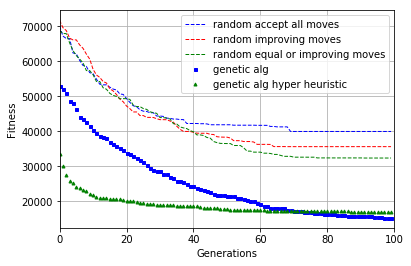

In [24]:
fig = plt.figure()
plt.grid(1)
plt.xlim([0, GENERATIONS])
plt.ion()
plt.xlabel('Generations')
plt.ylabel('Fitness')

generations = np.arange(0, GENERATIONS, REPORT_RATE)

plotColors = [
    'b--',
    'r--',
    'g--',
    'bs',
    'g^',
    'k'
]

plots = []
descriptions = []
for x, result in enumerate(overTimeResult):
    print(result[1])
    plots.append(plt.plot(generations, result[0], plotColors[x%len(plotColors)] , linewidth=1, markersize=3)[0])
    descriptions.append(result[1] + ' ' + result[2])

plt.legend(plots, descriptions)
fig.savefig(problems[problemIndex][1] + '.png')
plt.show(5)

plt.close()

In [25]:
padding = [None, None, None, None]

problem = []
problem.append(problemIndex + 1)
problem.extend(padding)

d = {
     'problem': problem,
     'type': list(map(lambda x: x[1] + ' ' + x[2], finalResultMean)),
     'mean': list(map(lambda x: x[0], finalResultMean)),
     'std': list(map(lambda x: x[0], finalResultStd)),
     'max': list(map(lambda x: x[0], finalResultMin))
    }

df = pd.DataFrame(data=d)

list(df.columns.values)

result = df[['problem', 'type', 'mean', 'std', 'max']]
result

,problem,type,mean,std,max
0,2.0,random accept all moves,39964.000000,11948.348170,20170.0
1,NaN,random improving moves,35636.000000,8896.806768,23750.0
2,NaN,random equal or improving moves,32386.000000,8342.353625,16880.0
3,NaN,genetic alg,15302.000000,3441.449695,9180.0
4,NaN,genetic alg hyper heuristic,16870.666667,6366.444813,6260.0


In [26]:
print(result.to_latex(index=False, bold_rows=True, na_rep=''))
with open(problems[problemIndex][1] + '.txt', 'w') as f:
    print(result.to_latex(index=False, bold_rows=True, na_rep=''), file=f)

\begin{tabular}{rlrrr}
\toprule
 problem &                             type &          mean &           std &      max \\
\midrule
     2.0 &          random accept all moves &  39964.000000 &  11948.348170 &  20170.0 \\
         &           random improving moves &  35636.000000 &   8896.806768 &  23750.0 \\
         &  random equal or improving moves &  32386.000000 &   8342.353625 &  16880.0 \\
         &                     genetic alg  &  15302.000000 &   3441.449695 &   9180.0 \\
         &     genetic alg hyper heuristic  &  16870.666667 &   6366.444813 &   6260.0 \\
\bottomrule
\end{tabular}

